In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modificación Imagen Lena:

In [53]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lena = cv.imread("/content/drive/Shareddrives/Imagenes/TP4 Grupo 1 /imagenes/lena_gray.tif", cv.IMREAD_GRAYSCALE)

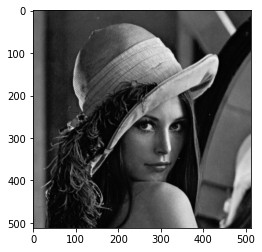

In [4]:
plt.imshow(lena,cmap='gray');

El negativo de una imagen es una imagen tal que las partes claras de la original aparecen oscuras y las partes oscuras aparecen claras. Como se trata de una imagen en escala de grises basta con restar el valor de cada pixel a 255 y se obtendrá el negativo de la imagen original. 
---



In [5]:
def negative(img):
  negative = 255 - img
  return negative

In [6]:
lenaNegative = negative(lena)

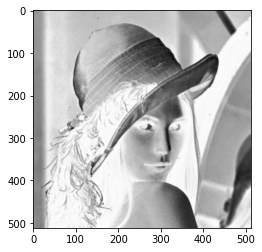

In [7]:
plt.imshow(lenaNegative, cmap='gray');

Transformación de contraste: la función debe ser capaz de mapear una serie de valores(In) a otros (Out). Se mapean los valores dentro del intervalo In al intervalo Out, mientras que los valores que queden fuera se truncan. Los que queden por debajo de LowIn se mapean a LowOut y los que queden por encima de HighIn se mapean a HighOut. 
---

El parámetro gamma sirve como ajuste de la curva:
---

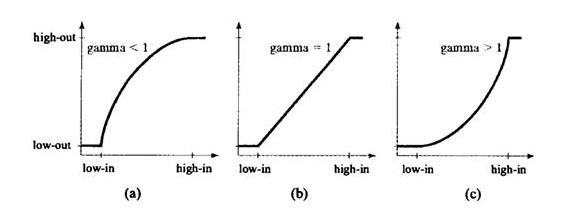

In [79]:
def imadjust(img, In=(0,1.0), Out=(0,1.0), gamma=1.0):
    "J = low_out +(high_out - low_out).* ((I - low_in)/(high_in - low_in)).^ gamma"
    low_in, high_in = In
    low_out, high_out = Out

    #Se desnormalizan los valores
    low_in *= 255.0
    high_in *= 255.0
 
    low_out *= 255.0
    high_out *= 255.0    
    
    k = (high_out - low_out) / (high_in - low_in)
         
    # Tabla de transformación (lookup table)
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    h,w = img.shape[:2]
    out = np.zeros((h,w), np.uint8)
    
    for r in range(h):
        for c in range(w):
            if img[r,c] <= low_in:
                out[r,c] = low_out                
            elif img[r,c] > high_in:
                out[r,c] = high_out
            else:
                res = int(k*(img[r,c]-low_in) + low_out)
                out[r, c] = table[res] #Compruebo tabla
               
    return out



In [80]:
adjusted = imadjust(lena, (0.25, 0.5), (0, 1))

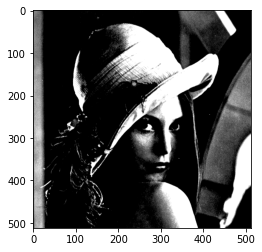

In [81]:
plt.imshow(adjusted, cmap='gray');


# Resaltado de capilares en el ojo

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
eye_pic = cv.imread("/content/drive/Shareddrives/Imagenes/TP4 Grupo 1 /imagenes/eyebw.jpg")

TypeError: ignored

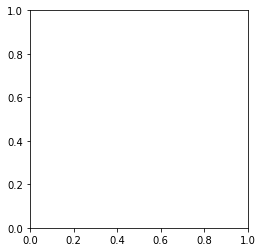

In [ ]:
plt.imshow(eye_pic);

In [ ]:
eye_pic = cv.cvtColor(eye_pic, cv.COLOR_BGR2GRAY)

Aplicamos High Boosting

In [ ]:
def get_laplace_high_boost_kernel_(A):
  laplacian_kernel_with_borders =  [[-1, -1, -1], 
                                    [-1, 8+A, -1], 
                                    [-1, -1, -1]]
  return np.array(laplacian_kernel_with_borders)

def high_boost_filter(img, A):
  img_original = img.copy()
  kernel = get_laplace_high_boost_kernel_(A)
  high_boosted = cv.filter2D(img_original, -1, kernel)
  return high_boosted

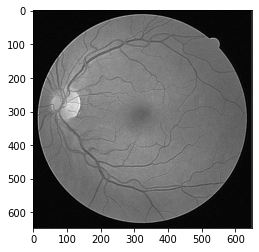

In [ ]:
eye_high_boosted = high_boost_filter(eye_pic, 1)
plt.imshow(eye_high_boosted, cmap="gray");

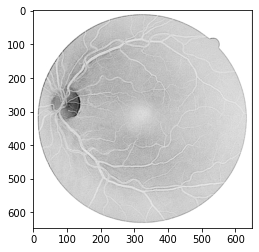

In [ ]:
eye_high_boosted_norm = eye_high_boosted.astype(np.float64)/255
eye_high_boosted_norm_exp = np.power(eye_high_boosted_norm, 2.0)
# eye_high_boosted_2 = high_boost_filter(eye_high_boosted_norm_exp.copy(), 3)
# eye_high_boosted_3 = cv.GaussianBlur(eye_high_boosted_2, (3,3), sigmaX=1)
# eye_high_boosted_3 = cv.medianBlur(eye_high_boosted_2, 3)
plt.imshow(-eye_high_boosted_norm_exp, cmap="gray");

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


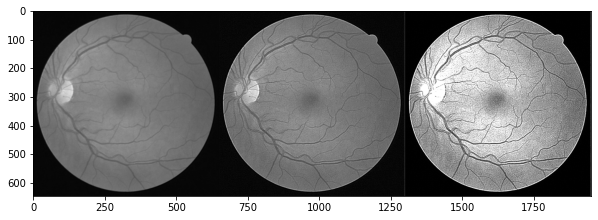

In [ ]:
stacked = np.hstack([eye_pic/255, eye_high_boosted/255, eye_high_boosted_3])
plt.figure(figsize=(10,10))
plt.imshow(stacked);

In [ ]:
cv.bin

# Bit Plane Slicing

Cada pixel dentro de una imagen se representa con un valor que va de 0 a 255. A su vez éste valor puede representarse en notación binaria como un número de 8 bits, cada uno de éstos bits son un denominado bit-plane. 

In [8]:
def sliceImage(img, plane=1):
  newSlice = np.zeros_like(img)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      #Hago and entre pixel y cada plano (0-7)
      if img[i][j] & 2**plane:
        newSlice[i][j] = 255
      else:
        newSlice[i][j] = 0

  return newSlice

Reproduzco ejemplo de la teoría: bit planes 0 a 7

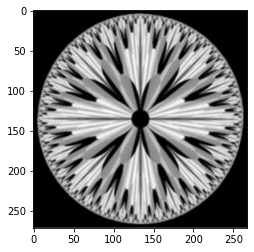

In [19]:
ejemplo = cv.imread("/content/drive/Shareddrives/Imagenes/TP4 Grupo 1 /imagenes/ejemplo.png", cv.IMREAD_GRAYSCALE)
plt.imshow(ejemplo, cmap='gray');

bitPlanes = []
for i in range(8):
    bitPlanes.append(sliceImage(ejemplo,i))

Bit planes 0-3


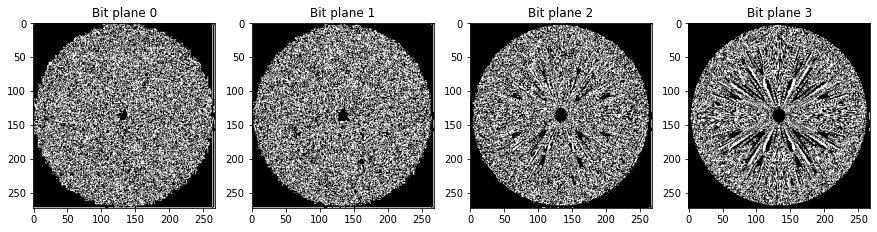

In [13]:
fig=plt.figure(figsize=(15, 10))

for i in range(4):
    fig.add_subplot(1, 4, i+1)
    plt.imshow(bitPlanes[i], cmap='gray')
    plt.title(f"Bit plane {i}")

Bit planes 4-7

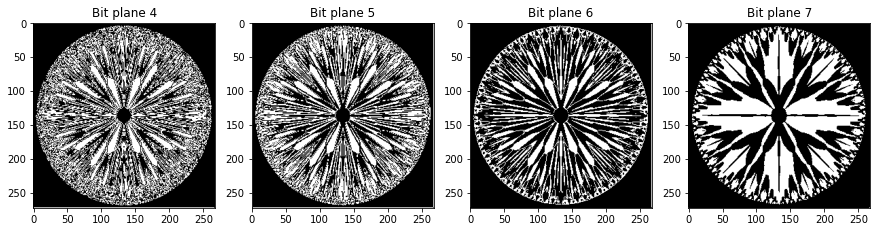

In [18]:
fig=plt.figure(figsize=(15, 10))
for i in range(4,8):
    fig.add_subplot(1, 4, i-3)
    plt.imshow(bitPlanes[i], cmap='gray')
    plt.title(f"Bit plane {i}")

Se hace lo mismo para la imagen del billete de un dólar: 
---

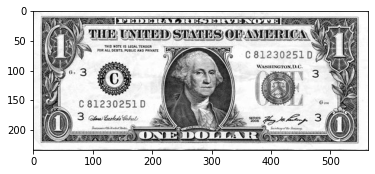

In [17]:
dollarBill = cv.imread("/content/drive/Shareddrives/Imagenes/TP4 Grupo 1 /imagenes/onedollar.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(dollarBill, cmap='gray');


In [20]:
dollarBitPlanes = []
for i in range(8):
    dollarBitPlanes.append(sliceImage(dollarBill,i))

Bit planes 0-3:

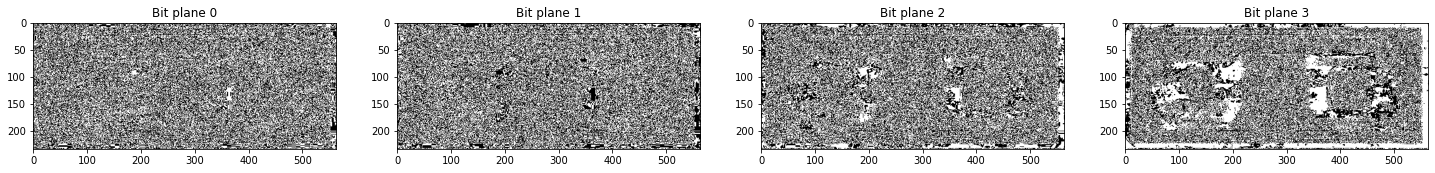

In [26]:
fig=plt.figure(figsize=(25, 18))

for i in range(4):
    fig.add_subplot(1, 4, i+1)
    plt.imshow(dollarBitPlanes[i], cmap='gray')
    plt.title(f"Bit plane {i}")

Bit planes 4-7:

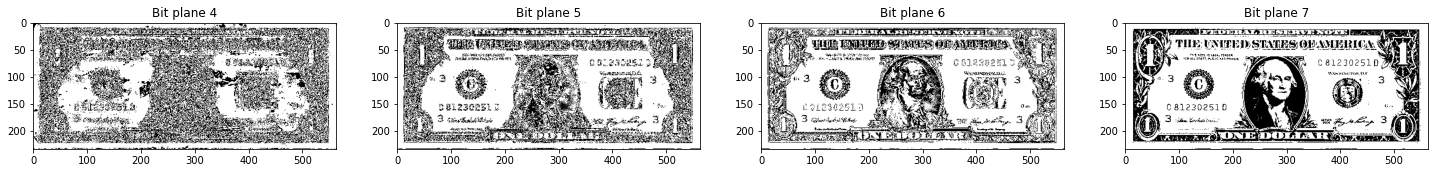

In [27]:
fig=plt.figure(figsize=(25, 18))
for i in range(4,8):
    fig.add_subplot(1, 4, i-3)
    plt.imshow(dollarBitPlanes[i], cmap='gray')
    plt.title(f"Bit plane {i}")

Reconstrucción:

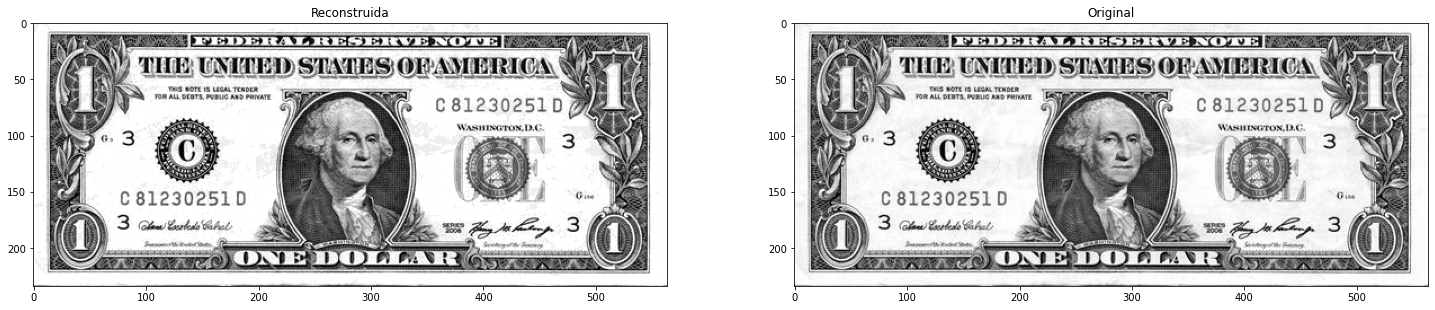

In [40]:
bpConfig = [8-1,7-1,6-1,5-1,1-1]
reconstructed = np.zeros_like(dollarBitPlanes[0])
reconstructed = reconstructed.astype(np.float64)

for bp in bpConfig:
    reconstructed += dollarBitPlanes[bp].astype(np.float64)*(2**(bp))/255.0

reconstructed = reconstructed.astype(np.int64)

fig=plt.figure(figsize=(25, 18))
fig.add_subplot(1, 2, 1)
plt.imshow(reconstructed, cmap='gray');
plt.title("Reconstruida");
fig.add_subplot(1, 2, 2)
plt.imshow(dollarBill, cmap='gray');
plt.title("Original");

Son prácticamente idénticas!!!

Prueba con otros planos: 

Prueba con 8-1

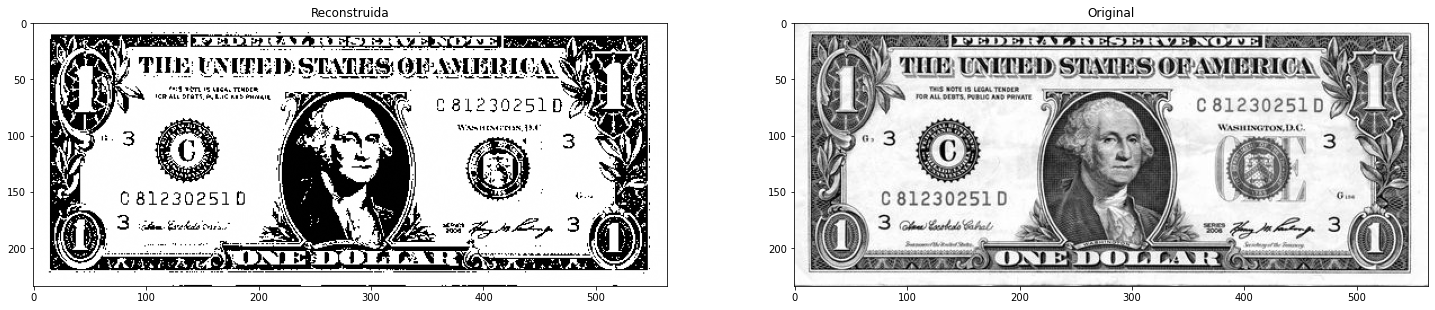

In [41]:
bpConfig = [8-1,1-1]
reconstructed = np.zeros_like(dollarBitPlanes[0])
reconstructed = reconstructed.astype(np.float64)

for bp in bpConfig:
    reconstructed += dollarBitPlanes[bp].astype(np.float64)*(2**(bp))/255.0

reconstructed = reconstructed.astype(np.int64)

fig=plt.figure(figsize=(25, 18))
fig.add_subplot(1, 2, 1)
plt.imshow(reconstructed, cmap='gray');
plt.title("Reconstruida");
fig.add_subplot(1, 2, 2)
plt.imshow(dollarBill, cmap='gray');
plt.title("Original");

Prueba con 7,6,5,4,3,2,1:

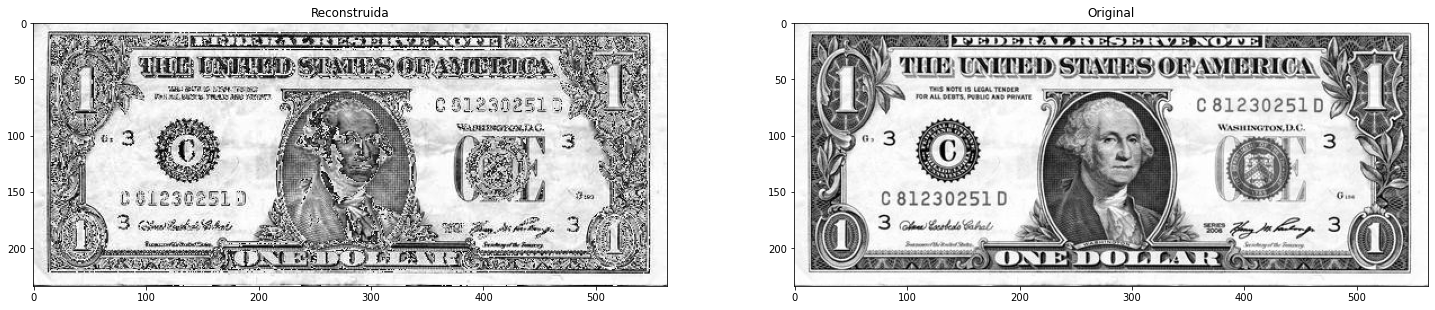

In [42]:
bpConfig = [7-1,6-1,5-1,4-1, 3-1, 2-1, 1-1]
reconstructed = np.zeros_like(dollarBitPlanes[0])
reconstructed = reconstructed.astype(np.float64)

for bp in bpConfig:
    reconstructed += dollarBitPlanes[bp].astype(np.float64)*(2**(bp))/255.0

reconstructed = reconstructed.astype(np.int64)

fig=plt.figure(figsize=(25, 18))
fig.add_subplot(1, 2, 1)
plt.imshow(reconstructed, cmap='gray');
plt.title("Reconstruida");
fig.add_subplot(1, 2, 2)
plt.imshow(dollarBill, cmap='gray');
plt.title("Original");

# Histograma

Un histograma de una imagen es la representación gráfica de la distribución de los tonos de una imagen. En concreto un histograma muestra en un gráfico el número de píxeles que hay para cada nivel de gris de la imagen. 


In [49]:
def getHist(img, plot=False, normalized=False, title=''):
  bins = 256
  histogram = np.zeros(bins)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      histogram[img[i][j]] += 1
  
  if normalized:
    histogram /= (img.shape[0] * img.shape[1])

  if plot:
    plt.figure()
    plt.plot(histogram)
    plt.xlim(0, bins)
    plt.title(f'{title} Histogram')
    plt.xlabel('Variaciones de Tono')
    plt.ylabel('Pixeles')
    plt.grid()

  return (histogram, bins-1)

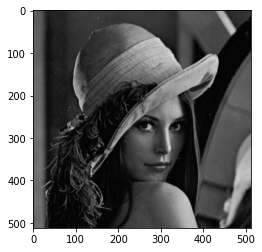

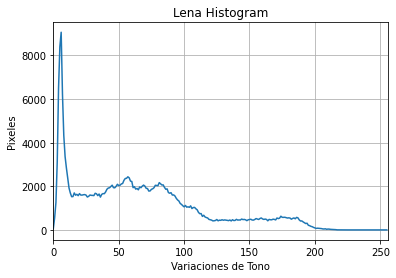

In [50]:
lena = cv.imread("/content/drive/Shareddrives/Imagenes/TP4 Grupo 1 /imagenes/lena_gray.tif", cv.IMREAD_GRAYSCALE)
plt.imshow(lena, cmap='gray', vmin=0, vmax=255)
hist, bins = getHist(lena, plot=True, title='Lena')

Para que se usa la ecualización de un histograma ?
---

La ecualización del histograma de una imagen es una transformación que sirve para obtener un histograma uniforme de esa misma imagen. En teoría se debería trnasformar un histograma a otro con una forma perfectamente uniforme para cualquier nivel de gris, es decir un histograma donde existan el mismo número de píxeles para cada nivel de gris. En la práctica ésto no puede lograrse, ya que las funciones de distribución son discretas en lugar de continuas. 






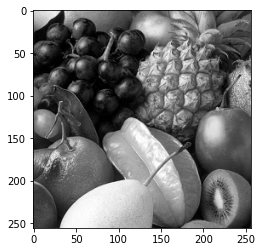

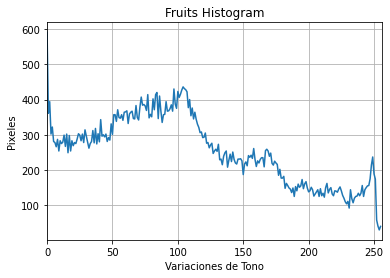

In [51]:
fruits = cv.imread("/content/drive/Shareddrives/Imagenes/TP4 Grupo 1 /imagenes/fruit.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(fruits, cmap='gray', vmin=0, vmax=255)
hist, bins = getHist(fruits, plot=True, title='Fruits')

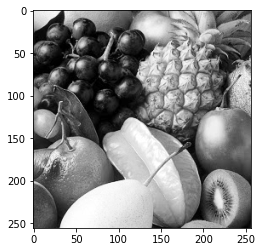

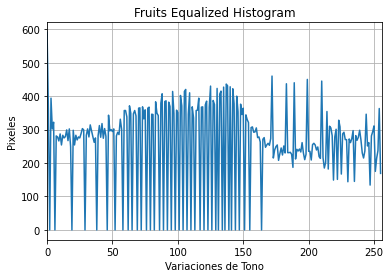

In [55]:
fruitsEqualized = cv.equalizeHist(fruits)
plt.imshow(fruitsEqualized, cmap='gray', vmin=0, vmax=255)
hist, bins = getHist(fruitsEqualized, plot=True, title='Fruits Equalized')

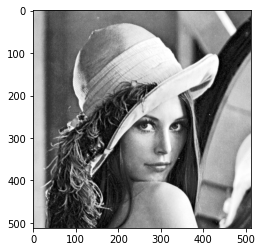

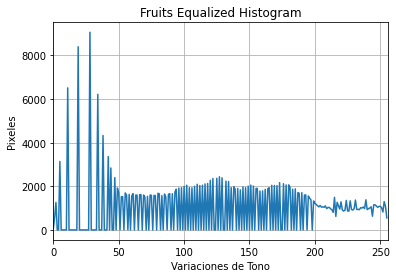

In [56]:
lenaEqualized = cv.equalizeHist(lena)
plt.imshow(lenaEqualized, cmap='gray', vmin=0, vmax=255)
hist, bins = getHist(lenaEqualized, plot=True, title='Fruits Equalized')

Compración entre imagenes sin ecualizar e imagenes ecualizadas:

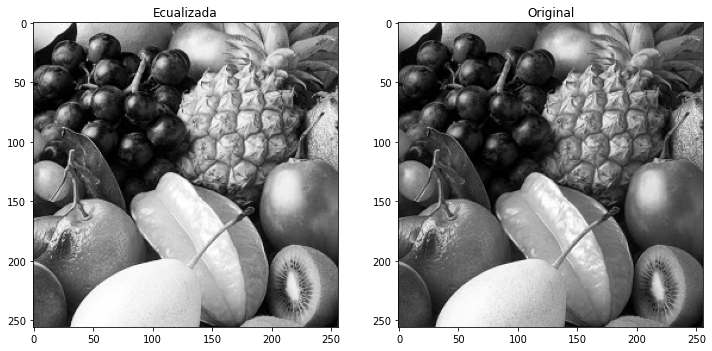

In [60]:
fig=plt.figure(figsize=(12, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(fruitsEqualized, cmap='gray');
plt.title("Ecualizada");
fig.add_subplot(1, 2, 2)
plt.imshow(fruits, cmap='gray');
plt.title("Original");

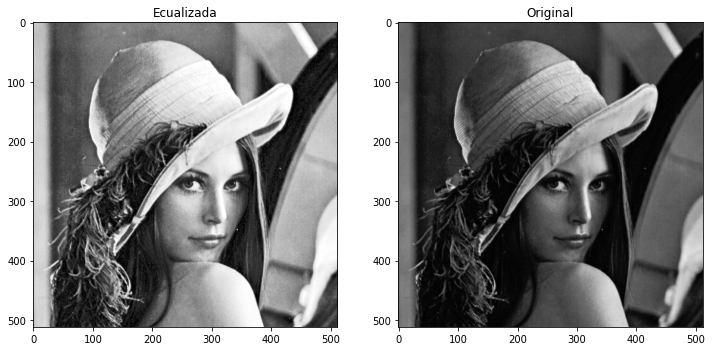

In [61]:
fig=plt.figure(figsize=(12, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(lenaEqualized, cmap='gray');
plt.title("Ecualizada");
fig.add_subplot(1, 2, 2)
plt.imshow(lena, cmap='gray');
plt.title("Original");

# Brillo y Contraste

El brillo se refiere a que tan clara o oscura es una imagen. Si se incrementa el brillo de una imagen los valores de todos los píxeles aumentan. 

Por otro lado el contrastees la diferencia de brillo entre los elementos (píxeles) de una imagen. Al incrementar el contraste las áreas claras se vuelven más claras y las zonas oscuras se tornan más oscuras. 

In [88]:
#Se modifican el contraste y el brillo al mismo tiempo. Ambos son valores en el rango [-127,127] (opencv los recorta al irse de rango)
def modifyImage(img, brightness=0, contrast=0):
  
  out = np.int16(img)
  out = out * (contrast/127+1) - contrast + brightness
  out = np.clip(out, 0, 255)
  out = np.uint8(out)

  return out


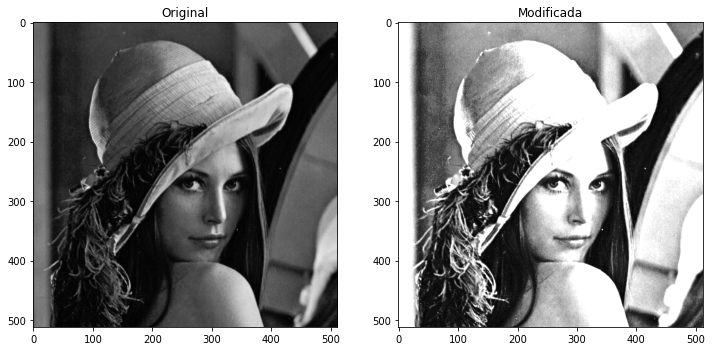

In [102]:
modified = modifyImage(lena, brightness=167, contrast=0)


fig=plt.figure(figsize=(12, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(lena, cmap='gray');
plt.title("Original");
fig.add_subplot(1, 2, 2)
plt.imshow(modified, cmap='gray');
plt.title("Modificada");

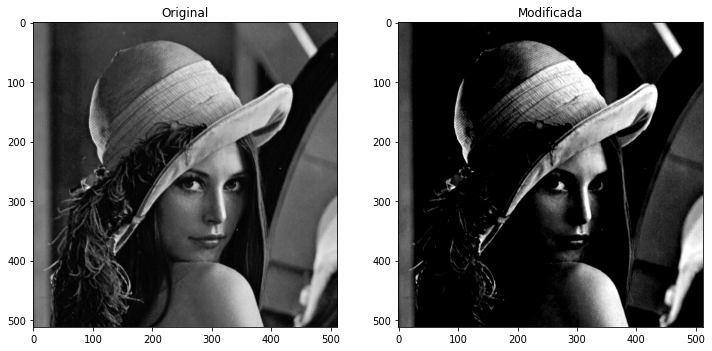

In [103]:
modified = modifyImage(lena, brightness=0, contrast=120)


fig=plt.figure(figsize=(12, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(lena, cmap='gray');
plt.title("Original");
fig.add_subplot(1, 2, 2)
plt.imshow(modified, cmap='gray');
plt.title("Modificada");

# HDR

El primer paso es cargar las imagenes con diferente nivel de exposición:

In [129]:
images = []
images2 = []
for i in range(6):
    image = cv.imread("/content/drive/Shareddrives/Imagenes/TP4 Grupo 1 /imagenes/HDR images/office_" + str(i + 1) + ".jpg")
    images.append(image)

  

Debido a que se sacan fotos distintas, éstas pueden estar ligeramente desalineadas. Por esos es necesario ajustarlas para evitar la aparición de artefactos:

In [130]:
alignMTB = cv.createAlignMTB()
alignMTB.process(images, images)

Ahora es necesario conseguir la función respuesta de la cámara (Camera Response Function). Esto es, algunos objetos aunque parezcan el doble de brillantes en la fotografía no lo son en cuanto a los valores de píxeles. Esta función no es linial y puede ser obtenida a partir de los tiempos de exposición de cada imagen:

In [131]:
times = np.array([0.0333, 0.1000, 0.3333, 0.6250, 1.3000, 4.0000] , dtype=np.float32)

calibrateDebevec = cv.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

Luego se juntan las imagenes.

In [134]:
mergeDebevec = cv.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)
cv.imwrite("hdrDebevec.jpg", hdrDebevec);

Se le aplica tone maping para que luzca mejor: 

In [136]:
#createTonemapDrago(gamma = 1.0,saturation = 1.0,bias = 0.85)

tonemapDrago = cv.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
cv.imwrite("ldr-Drago.jpg", ldrDrago * 255);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


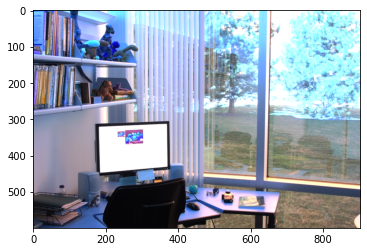

In [140]:
plt.imshow(ldrDrago)

La imagen final puede verse mejor en el archivo "ldr-drago.jpg" (adjuntado)